## Supervised Learning Module

### Week 4 - Regression

### What is learning in Machine Learning?

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish: supervised, semi-supervised, unsupervised, and reinforcement learning.

### What is Supervised Learning?

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$

### Formulation of regression problems

In regression problems the labels in the dataset are **numeric variables** of type int, float, taking **continuous** values. In other words they are not categoric variables. In statistics labels are called response variables.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target  # note that the labeles are also called targets

In [2]:
X.shape   # how many examples, how many features in each feature vector?

(506, 13)

In [3]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [4]:
y.shape   # as many labels as examples

(506,)

In [5]:
y[:3]

array([24. , 21.6, 34.7])

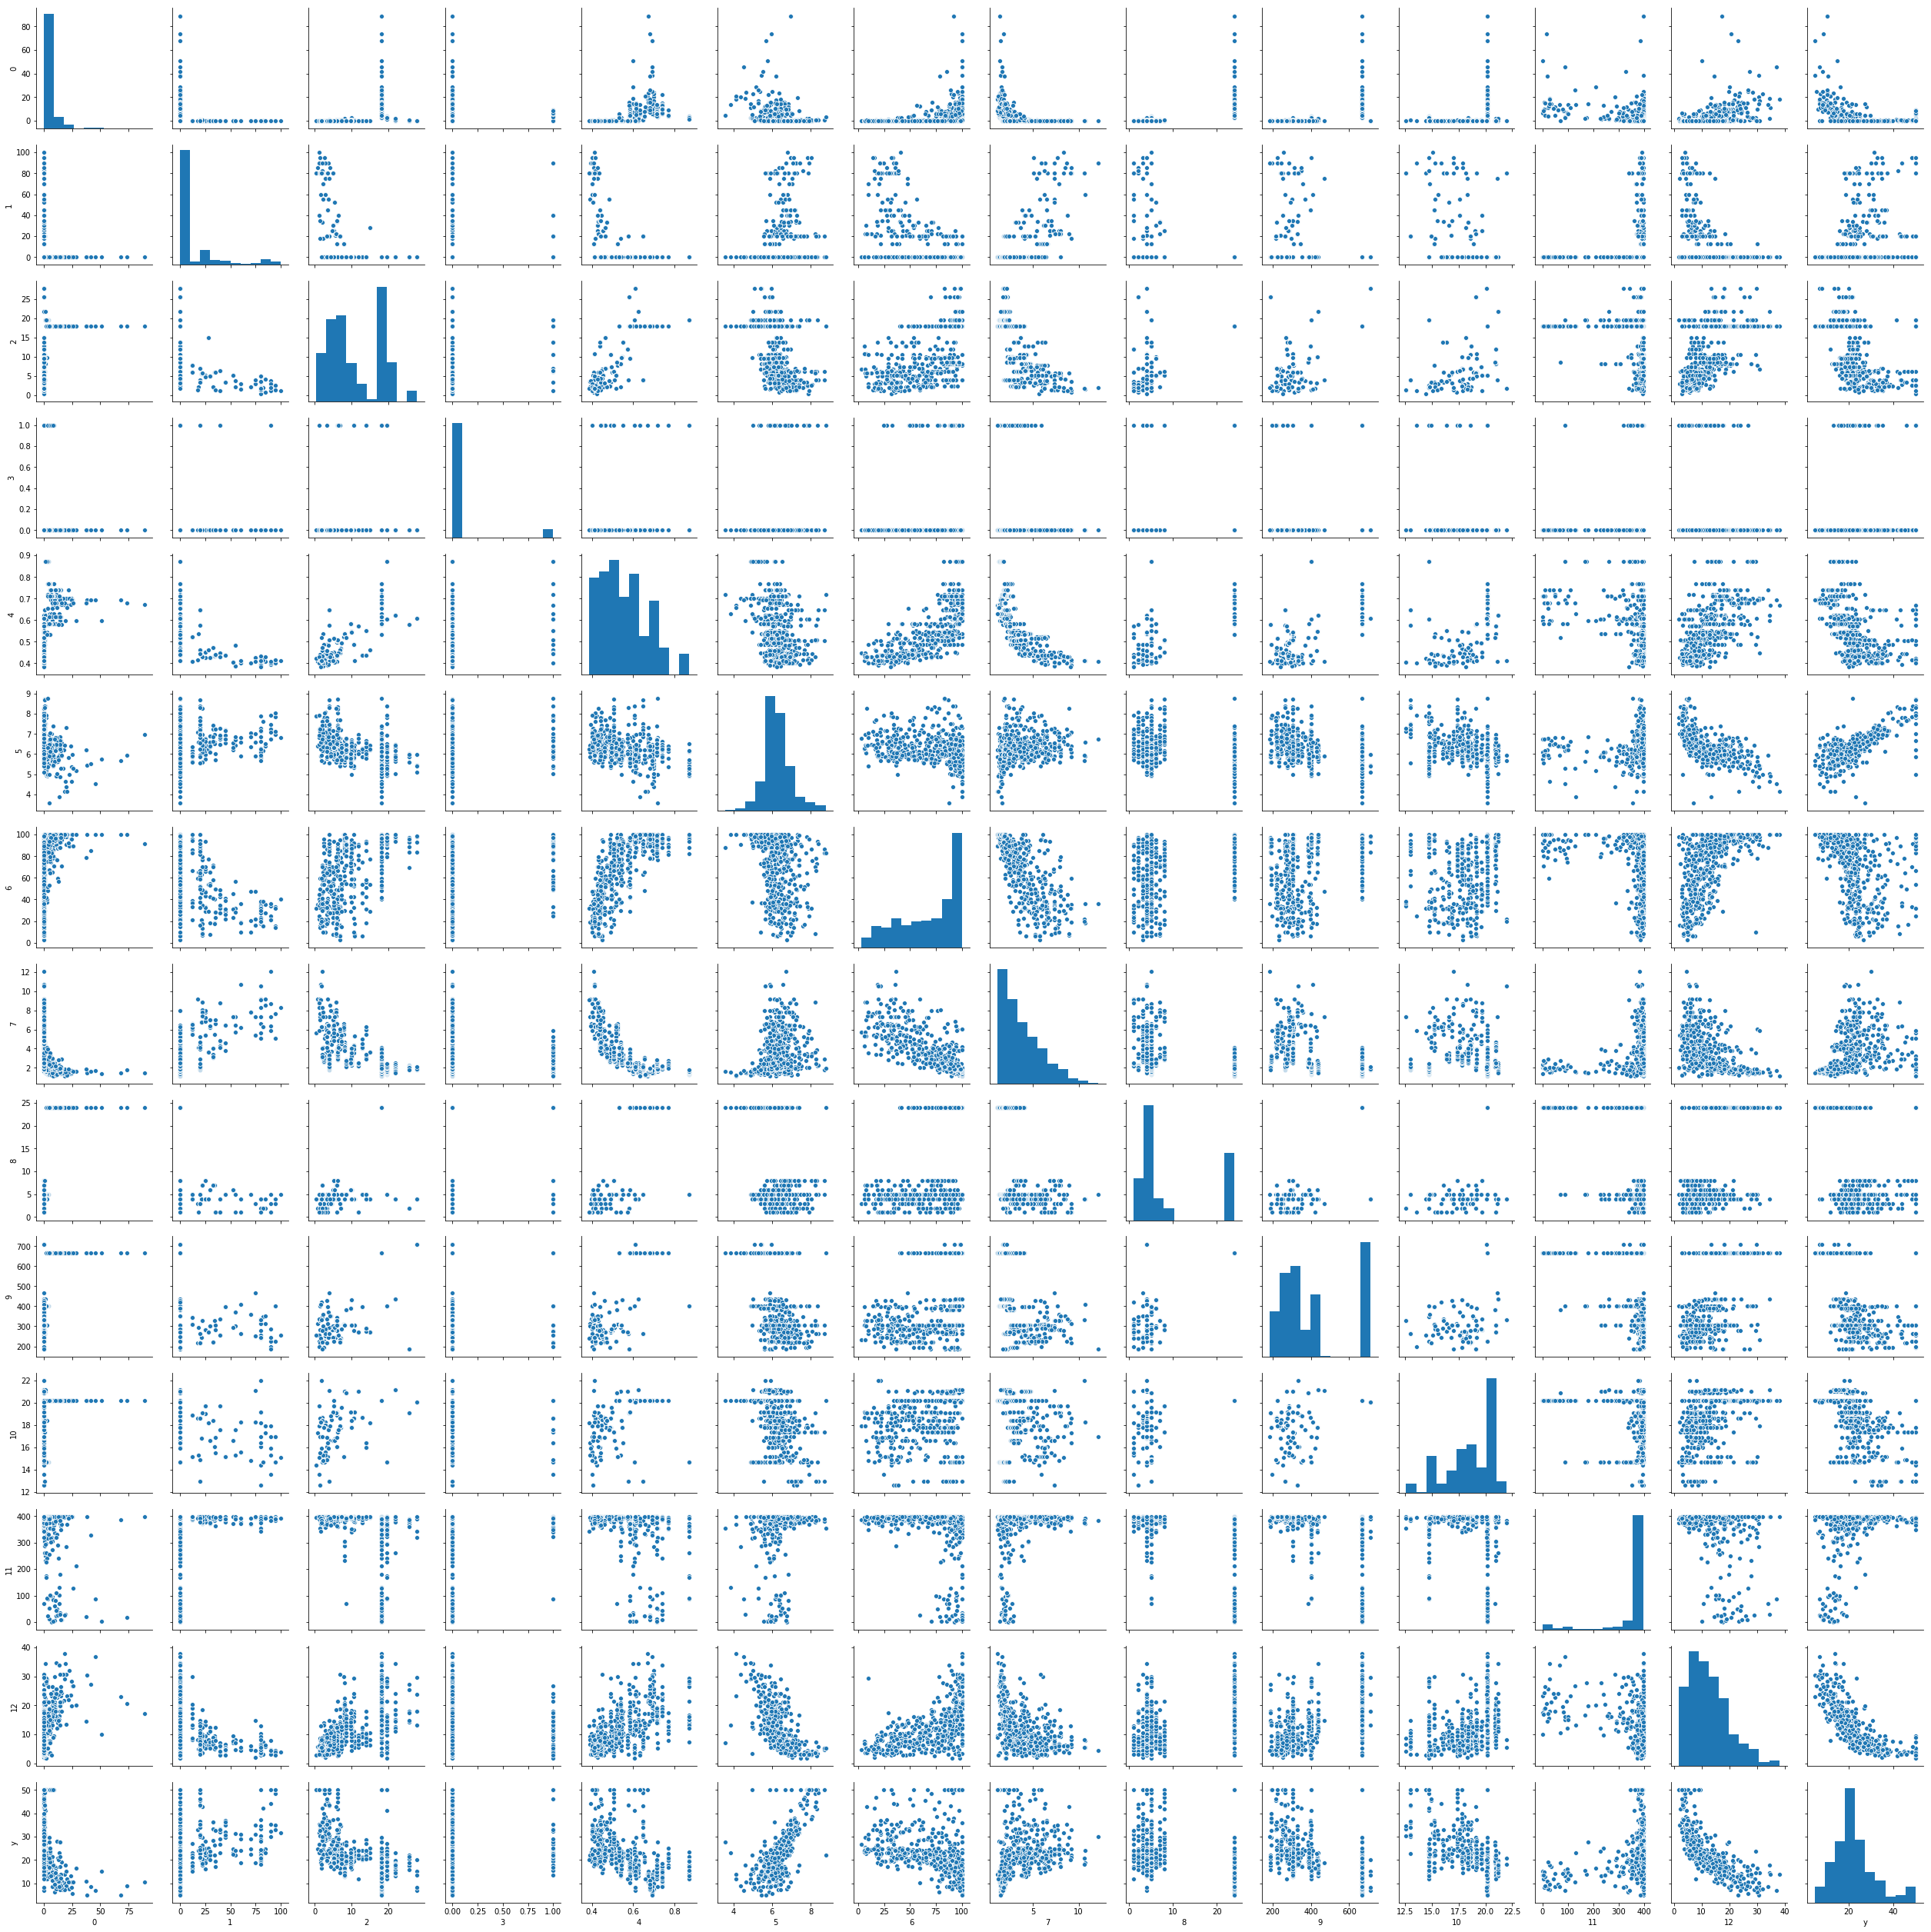

In [25]:
%matplotlib inline

import pandas as pd
import seaborn as sb

d = pd.DataFrame(X)
d['y'] = pd.Series(y)
sb.pairplot(d)

Note that some features could be categorical variables

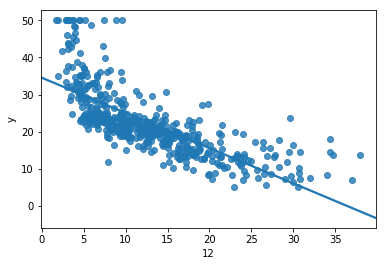

In [7]:
sb.regplot(d[12], "y", data=d, ci=None)

### Machine Learning methods to solve regression problems

We will consider the following methods in this class:

- Linear Regression
- Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting

Various regularization techniques for regression: Ridge, LASSO will be considered in the next class.

Other methods capable of both regressions and classification we will consider in the classification class.

Neural networks will be considered in Deep Learning module.

### Linear regression and closed form solution

We want to build a model $$f_{w, b}(x) = wx + b$$

so that it would predict us the label given new data $$y = f_{w,b}(x_{new})$$




We can formulate the training process as a linear algebra problem:

$$ y=w^TX + b$$

$ w $ are the parameters of the model that we are trying to **learn** in the **training** process.

For $b=0$, $w$ could be solved with:

$$ w = (X^TX)^{-1}X^Ty $$

However, that finding the inverse $(X^TX)^{-1}$ matrix may not be always possible.

In [9]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

w.shape

(13,)

In [10]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

**Loss function** measures how good we predict each example. Squared error is commonly used.

$$ SE = (f_{w,b}(x_i)- y_i)^2$$
for example $i$.

In [11]:
i = 100
b = 0 
se = (w.T.dot(X[i]) + b - y[i])**2
se

2.0143827830562384

**Cost function** is loss function for all the training examples. We will use Mean Squared Error
$$ MSE = \frac{1}{N}\sum_{i=1..N}{(f_{w,b}(x_i) - y_i)^2} $$

$$ MSE = \frac{1}{N}\sum_{i=1..N}{((wx_i + b) - y_i)^2} $$

We can find the parameters $w$, $b$ that minimize **cost function** by solving an optimization problem

### Gradient descent method
Gradient shows direction towards the minimum:
$$ \frac{dMSE}{dw} =  \frac{1}{N}\sum_{i=1..N}{-2x_i(y_i - (wx_i + b))} $$

$$ \frac{dMSE}{db} = \frac{1}{N}\sum_{i=1..N}{-2(y_i - (wx_i + b))}$$


By updating $w$ and  $b$ over multiple iterations we converge to the optimal values.
We can control the rate of convergence $\alpha$

$$ w_{updated} = w_{previous} - \alpha\frac{dMSE}{dw} $$

$$ b_{updated} = b_{previous} - \alpha\frac{dMSE}{db} $$

You can now implement linear regression with gradient descent. Rate of convergence $\alpha$ is a hyperparameter.
Gradient descent will allow to use any cost function for which we can express its derivative. Think about other cost functions.

Can you identify by looking at the cost function that normalization of data is critical for Linear Regression or not?

### Sklearn implemenentation



In [12]:
from sklearn.linear_model import LinearRegression

# init
lr = LinearRegression()

# Learning
lr.fit(X, y)

# Learned model w and b:
lr.coef_, lr.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]), 36.459488385089855)

In [13]:
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)

0.7406426641094095

In [14]:
from sklearn.metrics import mean_squared_error

# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)

21.894831181729202

### Making predictions on new data

In [15]:
X_new = X[100] * 0.01*np.random.random()  # new example
y_new = np.dot(lr.coef_, X_new) + lr.intercept_
y_new

36.3964592749983

In [16]:
# or simply:
lr.predict([X_new])

array([36.39645927])

### How data normalization effects linear regression

In [21]:
from sklearn.preprocessing import normalize

X_copy = X.copy()
X_copy[5] *= 1000000
X_copy[4] *= 0.000001
X_copy[12] *= 0.0001
y_model = LinearRegression().fit(X_copy, y).predict(X_copy)
mean_squared_error(y, y_model)

22.223458525930877

In [22]:
X_norm = normalize(X_copy)
y_model = LinearRegression().fit(X_norm, y).predict(X_norm)
mean_squared_error(y, y_model)

21.601290487784162

### How outliers affect linear regression?

### Regression with Nearest Neighbors
How do we find nearest neighbor?

How many nearest neighbors?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png)

In [26]:
from scipy.spatial.distance import euclidean, cdist

euclidean(X[0], X[1])

58.955079696240766

In [29]:
np.round(cdist(X[:5], X[:-5]))

array([[  0.,  59.,  57., ...,  98.,  98.,  99.],
       [ 59.,   0.,  19., ..., 150., 149., 149.],
       [ 57.,  19.,   0., ..., 149., 150., 151.],
       [ 79.,  40.,  26., ..., 171., 172., 173.],
       [ 77.,  32.,  22., ..., 170., 171., 171.]])

In [37]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [38]:
distances

array([[ 0.        , 16.0970999 , 16.99995447, 18.40100218, 18.73017253],
       [ 0.        , 15.39261599, 18.97631935, 20.48055632, 22.94969355],
       [ 0.        ,  8.07879279,  8.89317332, 15.85302882, 15.91349082],
       ...,
       [ 0.        ,  3.94748354,  9.40019876, 10.49126305, 10.79449174],
       [ 0.        ,  3.94748354,  8.83081803,  8.91544878,  9.31201061],
       [ 0.        ,  4.2784823 ,  9.31201061,  9.48456264, 10.49126305]])

In [39]:
indices

array([[  0, 241,  62,  81,  60],
       [  1,  47,   2,  49,  87],
       [  2,  85,  87,  49,  84],
       ...,
       [503, 504, 219, 505,  88],
       [504, 503, 219, 217, 505],
       [505, 502, 504, 217, 503]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [40]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [69]:
from sklearn.neighbors import KNeighborsRegressor

nnr = KNeighborsRegressor(n_neighbors=5)
nnr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

What is the model in case of Nearest Neighbors?

In [70]:
y_pred_nn = nnr.predict(X)

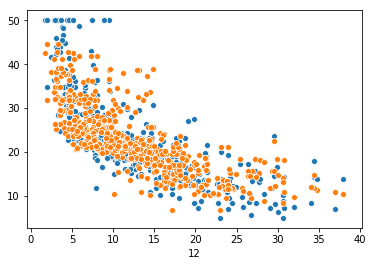

In [71]:
sb.scatterplot(d[12], y)
sb.scatterplot(d[12], y_pred_nn)

Notice how KNN handles nonlinearity!

Also, what does NNR(n_neighbors=1) mean?

In [93]:
indices = np.random.randint(2, size=X.shape[0])
y_pred_nn = nnr.predict(X_test)
# indices

In [92]:
# np.logical_not(indices)

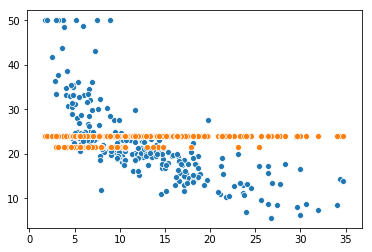

In [95]:
X_train = X[indices]
X_test = X[np.logical_not(indices)]
y_train = y[indices]
y_test = y[np.logical_not(indices)]

nnr = KNeighborsRegressor(n_neighbors=5)
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

sb.scatterplot(X_test[...,12], y_test)
sb.scatterplot(X_test[...,12], y_pred_nn)

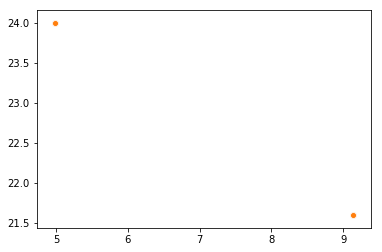

In [96]:
sb.scatterplot(X_train[...,12], y_train)
y_pred_nn_train = nnr.predict(X_train)
sb.scatterplot(X_train[...,12], y_pred_nn_train)

What are the main hyperparameters of KNN Regressor?
- distance metric
- K

### Rule-based model:
Regression with decision tree

How a tree is built?

Hyperparameters: tree depth, cutoff

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
dtr = DecisionTreeRegressor(max_depth=5)

# Fit 

# Predict

# Test

### Ensemble methods

collection of weak (poor performing) models makes a strong and robust model

### Ensemble methods: bagging - Random Forest

![](https://dsc-spidal.github.io/harp/img/4-5-1.png)

Features:
    - sampling of training examples with replacement
    - subsampling the features
    - shallow trees

In [ ]:
sklearn.ensemble import RandomForestRegressor


# Fit 

# Predict

# Test

### Ensemble methods: boosting - Gradient Boosting
Sequential improvement of models by training on their errors

![](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png?w=992)

See also: http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Fit 

# Predict

# Test

### Homework assignment